In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sal = pd.read_csv('D:/Repo Python/Data Analyst Program/Refactored_Py_DS_ML_Bootcamp-master/04-Pandas-Exercises/Salaries.csv')

In [3]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [5]:
sal['BasePay'].mean()

66325.44884050643

In [6]:
sal['OvertimePay'].max()

245131.88

In [7]:
emp = sal.loc[lambda df:df['EmployeeName'] == 'JOSEPH DRISCOLL']
emp['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [8]:
emp['TotalPay']

24    270324.91
Name: TotalPay, dtype: float64

In [9]:

sal.loc[lambda x:x['TotalPay'] == sal['TotalPay'].max() ]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [10]:
sal.loc[lambda x:x['TotalPay'] == sal['TotalPay'].min() ]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [11]:
avg_byYear= sal.groupby('Year')
res = avg_byYear.mean()
res['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

In [12]:
sal['JobTitle'].nunique()

2159

In [13]:
most_job = sal['JobTitle'].value_counts().head(5)
most_job

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

In [14]:
sum(sal[sal['Year']==2013]['JobTitle'].value_counts()==1 )

202

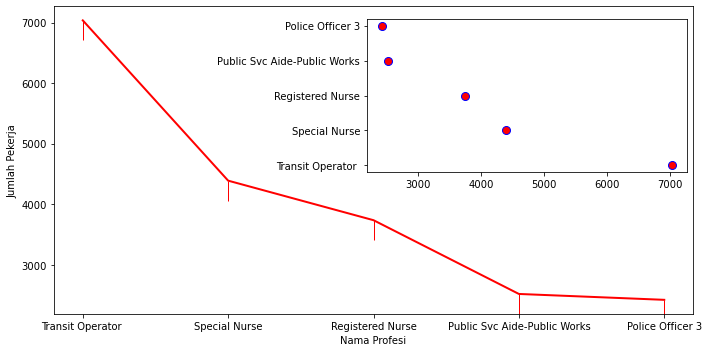

In [49]:
fig,most_job_fig = plt.subplots(1,1,figsize=(10,5))
y = ['Transit Operator ','Special Nurse','Registered Nurse','Public Svc Aide-Public Works','Police Officer 3']
most_job_fig.plot(y,most_job,color='red',
                  lw=2,marker=3, 
                  markersize=20,
                  mfc='blue')
most_job_fig.set_xlabel('Nama Profesi')
most_job_fig.set_ylabel('Jumlah Pekerja')

ax1 = most_job_fig.inset_axes([0.49,0.46,0.5,0.5])
ax1.scatter(most_job,y,color='red',edgecolors='blue',s=4**3)

fig.tight_layout()

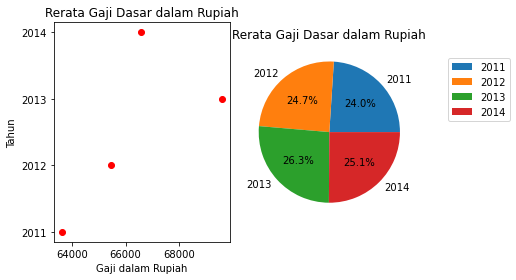

In [38]:
fig,avg_byYear_plot = plt.subplots(1,2)
y = ['2011','2012','2013','2014']
avg_byYear_plot[0].scatter(res['BasePay'],y, color='red')
avg_byYear_plot[0].set_title('Rerata Gaji Dasar dalam Rupiah')
avg_byYear_plot[0].set_xlabel('Gaji dalam Rupiah')
avg_byYear_plot[0].set_ylabel('Tahun')

avg_byYear_plot[1].pie(res['BasePay'],labels=y,autopct='%1.1f%%')
avg_byYear_plot[1].set_title('Rerata Gaji Dasar dalam Rupiah')
fig.legend(loc='upper right', bbox_to_anchor=(1.2, 0.8))
fig.tight_layout()